In [1]:
from maskmm.ipstartup import *
import math
from skimage.io import imread
from maskmm.models.maskrcnn import MaskRCNN
from maskmm.samples.coco.config import Config
from maskmm.utils import visualize
import torch

ROOT_DIR = "/home/ubuntu/maskmm"
LOGS = f"{ROOT_DIR}/logs"
IMAGES = f"{ROOT_DIR}/data/images"

class Config(Config):
    IMAGES_PER_GPU = 1
config = Config()

[root:INFO]: (ipstartup.py:17, time=20:45)


In [2]:
model = MaskRCNN(config, LOGS)
model.load_state_dict(torch.load(config.WEIGHTS))
model.eval()
_

[root:INFO]:starting (cellevents.py:36, time=20:45)


''

time: 391 ms


In [3]:
image1 = imread(f'{IMAGES}/streetscene.jpg')
image2 = imread(f'{IMAGES}/suitcase.jpg')
images = [image1, image2]
results = model.predict(images)

[root:INFO]:starting (cellevents.py:36, time=20:45)
[root:INFO]:tensor([1024., 1024., 1024., 1024.]) (detections.py:67, time=20:45)
[root:INFO]:tensor([1024., 1024., 1024., 1024.]) (detections.py:67, time=20:45)
[root:INFO]:tensor(0.4883) (image_utils.py:233, time=20:45)
[root:INFO]:tensor(0.6250) (image_utils.py:233, time=20:45)


time: 2.55 s


[root:INFO]:starting (cellevents.py:36, time=20:45)


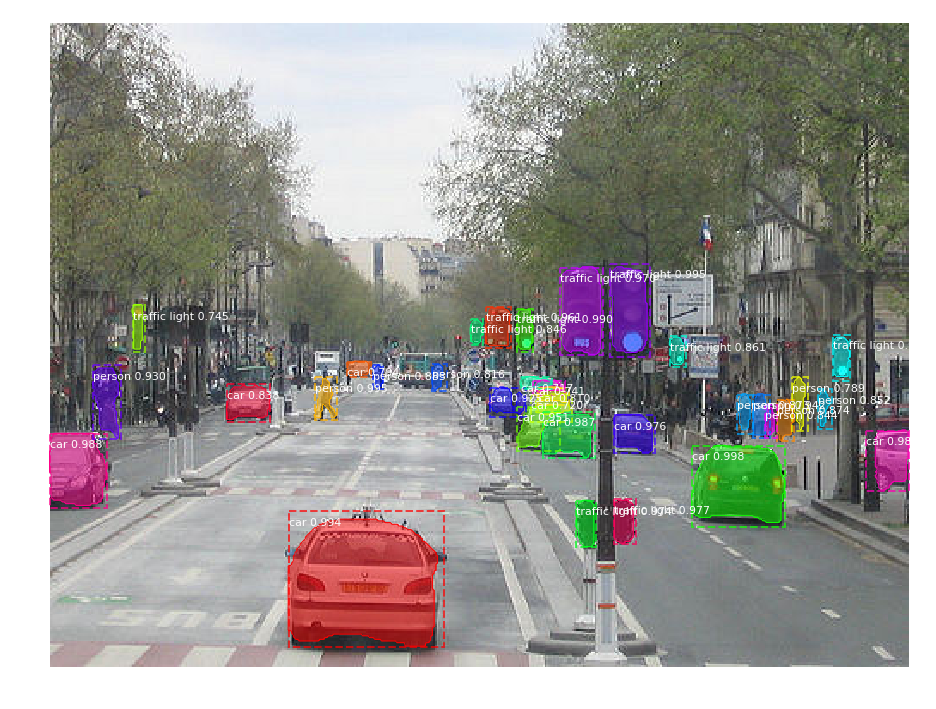

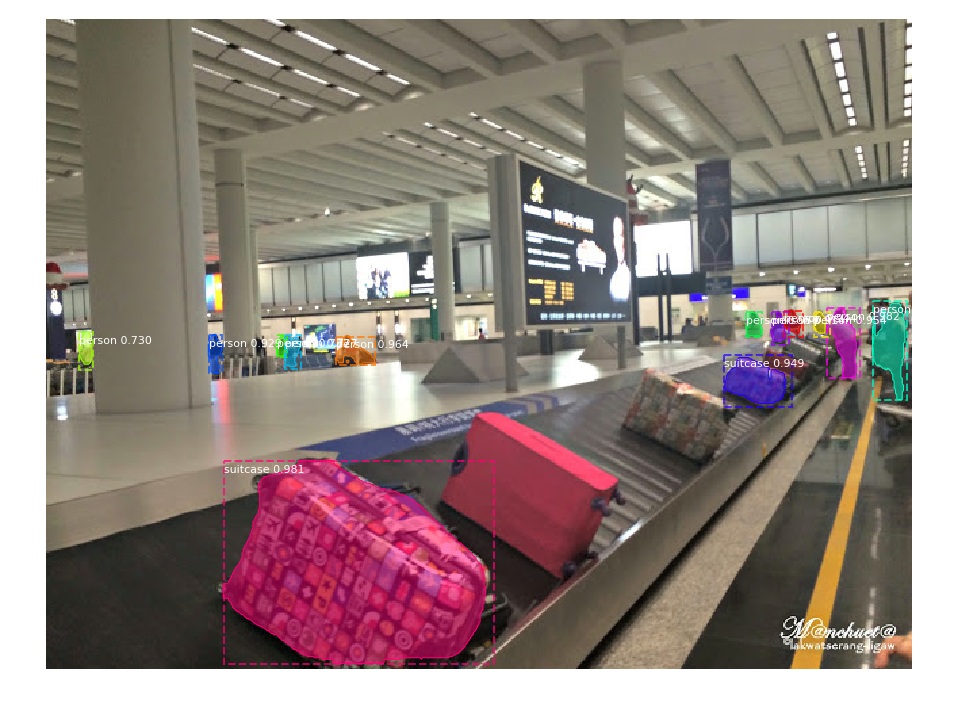

time: 2.59 s


In [4]:
# Visualize results
for image, res in zip(images, results):
    boxes, class_ids, scores, masks = res
    visualize.display_instances(image, boxes, masks, class_ids,
                            config.CLASS_NAMES, scores)
    plt.show()